In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

**SalaryData Dataset**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [3]:
train=pd.read_csv('SalaryData_Train(1).csv')
train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [4]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [5]:
test=pd.read_csv('SalaryData_Test(1).csv')
test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [9]:
test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [10]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

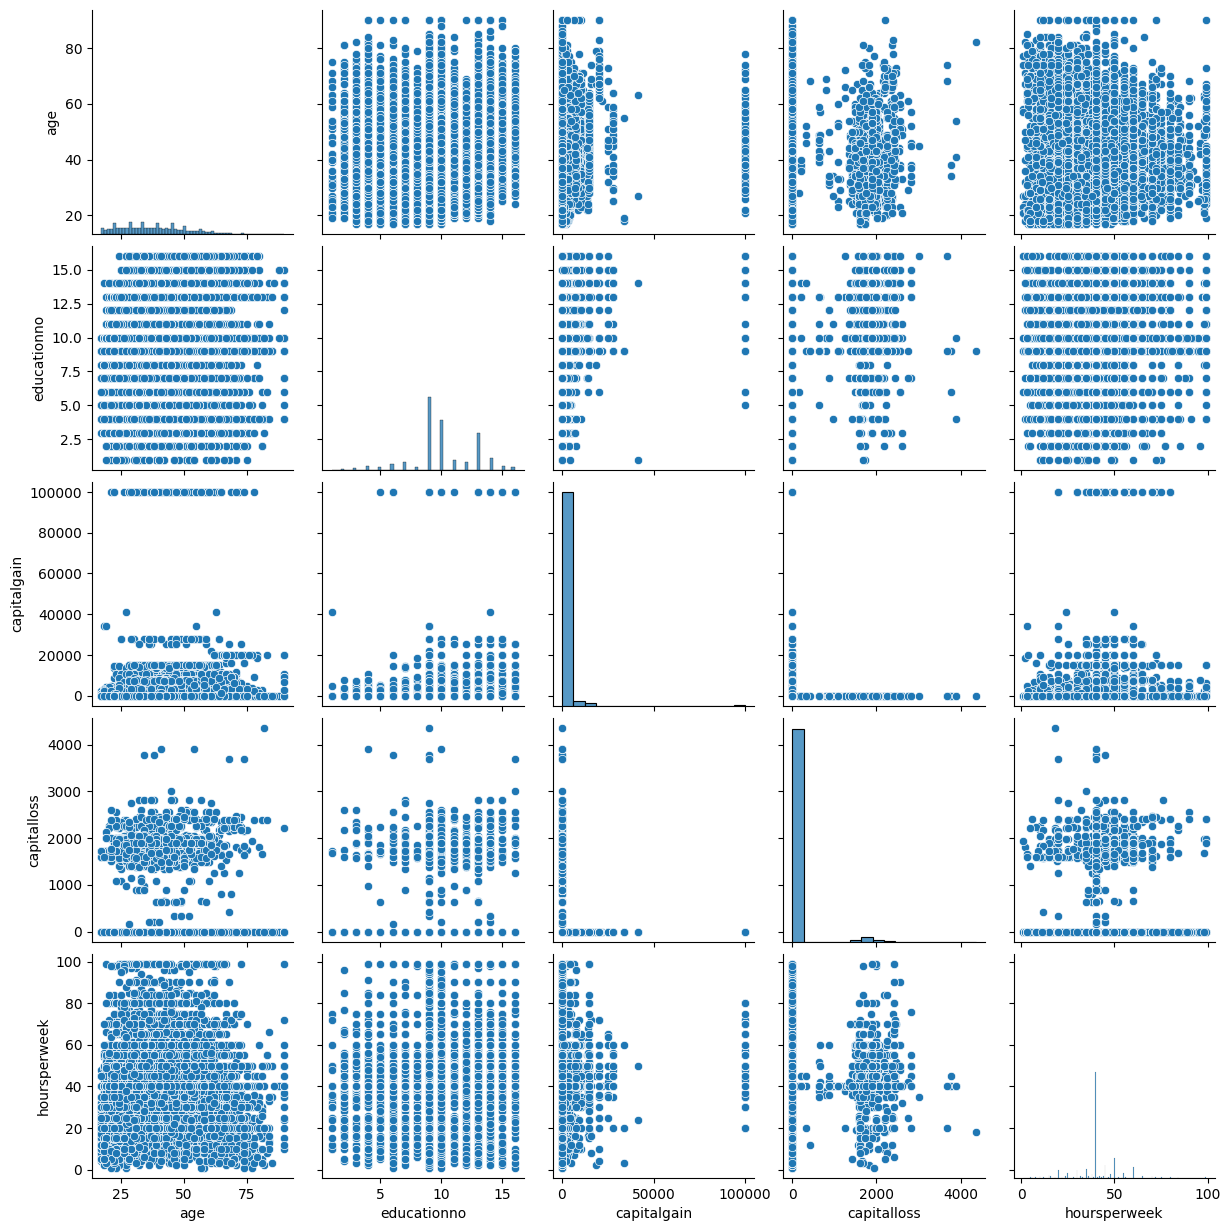

In [16]:
sns.pairplot(train)

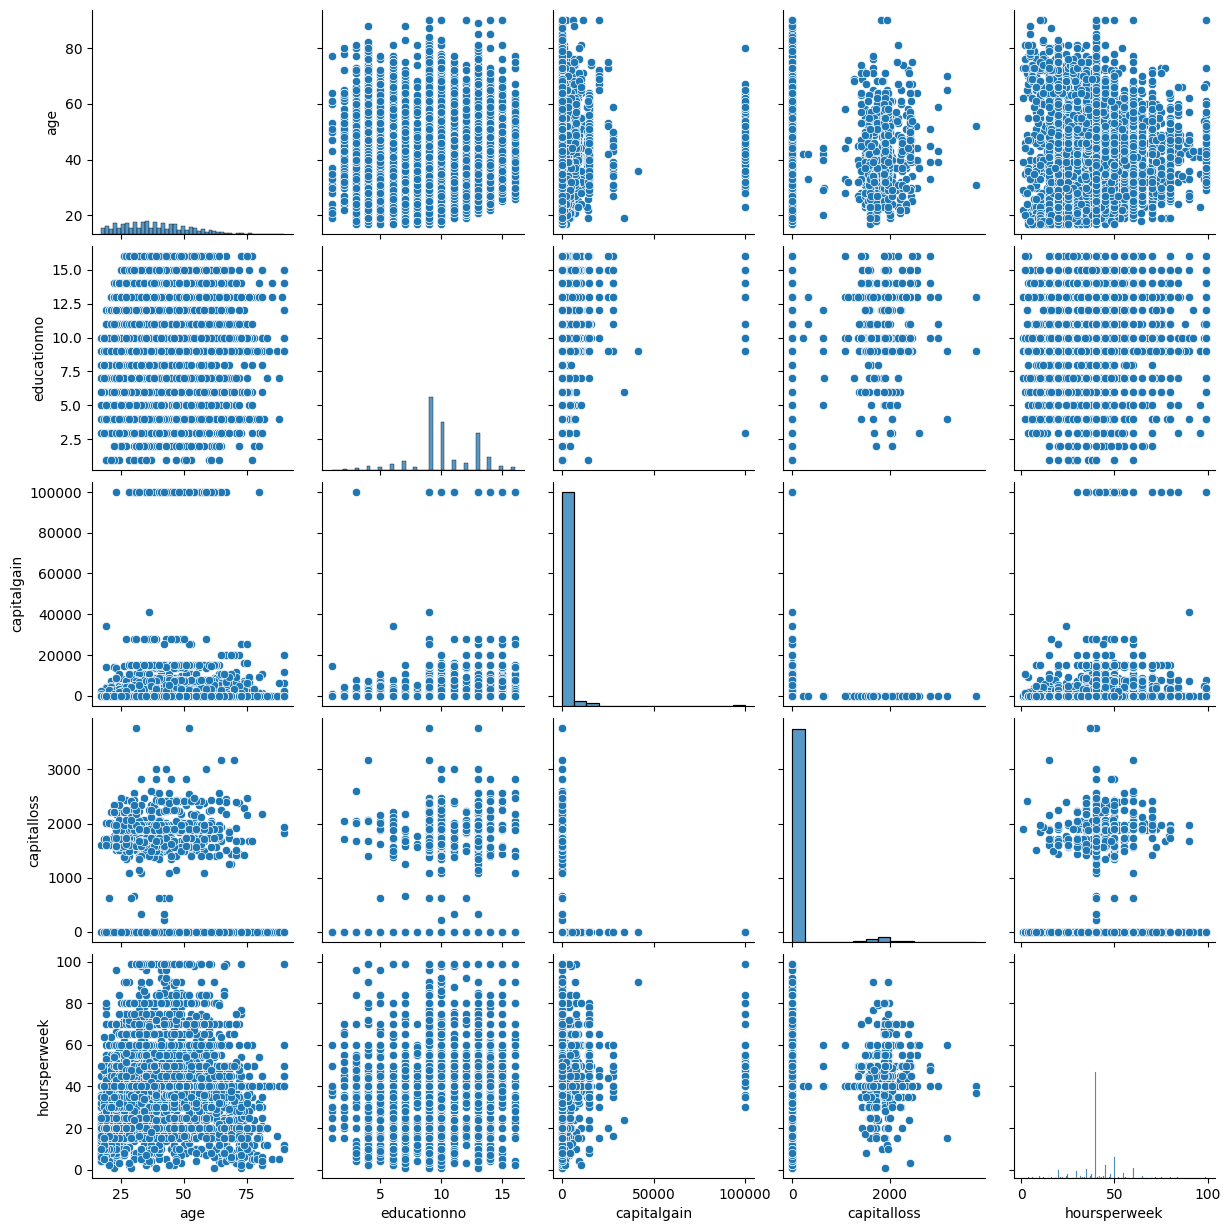

In [13]:
sns.pairplot(test)

<ipython-input-14-9fc934149bb9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='magma', annot=True, fmt=".3f")


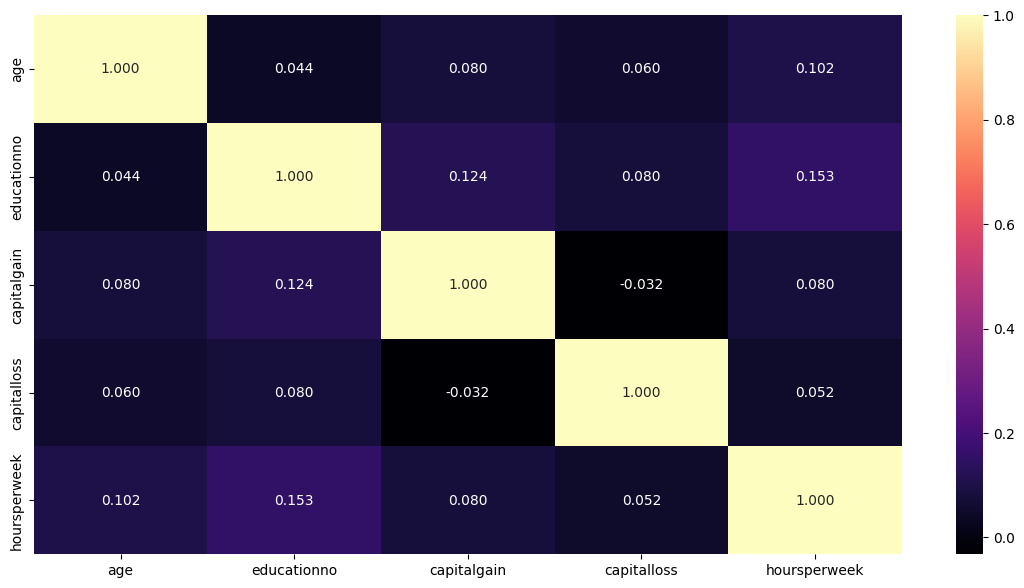

In [14]:
plt.figure(figsize=(14,7));
sns.heatmap(train.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

<ipython-input-15-9222195a29e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(), cmap='magma', annot=True, fmt=".3f")


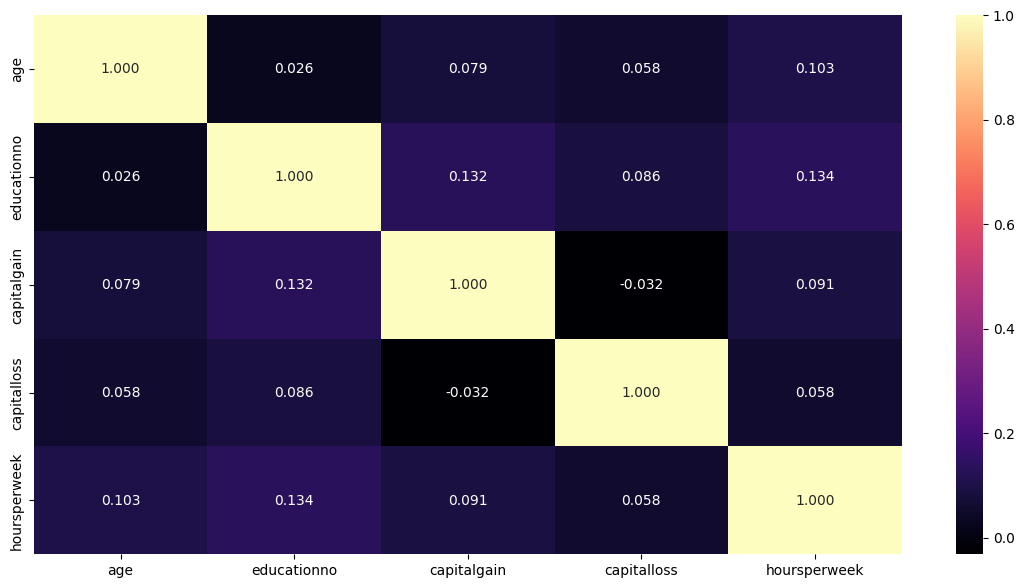

In [15]:
plt.figure(figsize=(14,7));
sns.heatmap(test.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [17]:
label_encoder=preprocessing.LabelEncoder()

In [18]:
train=train.apply(LabelEncoder().fit_transform)
train

age  workclass  education  educationno  maritalstatus  occupation  \
0       22          5          9           12              4           0   
1       33          4          9           12              2           3   
2       21          2         11            8              0           5   
3       36          2          1            6              2           5   
4       11          2          9           12              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   10          2          7           11              2          12   
30157   23          2         11            8              2           6   
30158   41          2         11            8              6           0   
30159    5          2         11            8              4           0   
30160   35          3         11            8              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1           24            0            39   
1                 0     4    1            0            0            12   
2                 1     4    1            0            0            39   
3                 0     2    1            0            0            39   
4                 5     2    0            0            0            39   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            37   
30157             0     4    1            0            0            39   
30158             4     4    0            0            0            39   
30159             3     4    1            0            0            19   
30160             5     4    0          107            0            39   

       native  Salary  
0          37       0  
1          37       0  
2          37       0  
3          37       0  
4           4       0  
...       ...     ...  
30156      37       0  
30157      37       1  
30158      37       0  
30159      37       0  
30160      37       1  

[30161 rows x 14 columns]

In [19]:
test=test.apply(LabelEncoder().fit_transform)
test

age  workclass  education  educationno  maritalstatus  occupation  \
0        8          2          1            6              4           6   
1       21          2         11            8              2           4   
2       11          1          7           11              2          10   
3       27          2         15            9              2           6   
4       17          2          0            5              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   16          2          9           12              4           9   
15056   22          2          9           12              0           9   
15057   21          2          9           12              2           9   
15058   27          2          9           12              0           0   
15059   18          3          9           12              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            39   
1                 0     4    1            0            0            49   
2                 0     4    1            0            0            39   
3                 0     2    1           87            0            39   
4                 1     4    1            0            0            29   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            39   
15056             1     4    0            0            0            35   
15057             0     4    1            0            0            49   
15058             3     1    1           73            0            39   
15059             0     4    1            0            0            59   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[15060 rows x 14 columns]

In [20]:
x_train=train.drop(['maritalstatus','sex','native','race','relationship','Salary'],axis=1).values
y_train=train['Salary'].values

In [21]:
x_train

array([[ 22,   5,   9, ...,  24,   0,  39],
       [ 33,   4,   9, ...,   0,   0,  12],
       [ 21,   2,  11, ...,   0,   0,  39],
       ...,
       [ 41,   2,  11, ...,   0,   0,  39],
       [  5,   2,  11, ...,   0,   0,  19],
       [ 35,   3,  11, ..., 107,   0,  39]])

In [22]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [23]:
x_test=test.drop(['maritalstatus','sex','native','race','relationship','Salary'],axis=1).values
y_test=test['Salary'].values

In [24]:
x_test

array([[ 8,  2,  1, ...,  0,  0, 39],
       [21,  2, 11, ...,  0,  0, 49],
       [11,  1,  7, ...,  0,  0, 39],
       ...,
       [21,  2,  9, ...,  0,  0, 49],
       [27,  2,  9, ..., 73,  0, 39],
       [18,  3,  9, ...,  0,  0, 59]])

In [25]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [26]:
columns=["age","workclass","education","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","native","Salary"]

In [27]:
number=preprocessing.LabelEncoder()
for i in columns:
    train[i]=number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

colnames=train.columns

In [28]:
trainx=train[colnames[0:13]]
trainy=train[colnames[13]]
testx=test[colnames[0:13]]
testy=test[colnames[13]]

In [29]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [30]:
trainx=norm_func(trainx)
testx=norm_func(testx)

In [31]:
model_linear=SVC(kernel="linear")
model_linear.fit(trainx,trainy)
pred_test_linear=model_linear.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_linear))

Accuracy: 0.8034528552456839


In [32]:
model_poly=SVC(kernel="poly", gamma="auto")
model_poly.fit(trainx,trainy)
pred_test_poly=model_poly.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_poly))

Accuracy: 0.8247011952191236


In [33]:
model_rbf=SVC(kernel="rbf", gamma="auto")
model_rbf.fit(trainx,trainy)
pred_test_rbf=model_rbf.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_rbf))

Accuracy: 0.8330013280212484


In [34]:
from sklearn.metrics import classification_report
model=SVC()
model.fit(trainx,trainy)
pred=model.predict(testx)
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     12243
           1       0.56      0.74      0.64      2817

    accuracy                           0.84     15060
   macro avg       0.75      0.80      0.77     15060
weighted avg       0.87      0.84      0.85     15060



**Forest Fires Dataset**

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [36]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [37]:
forest=pd.read_csv('forestfires.csv')
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [38]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [39]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [40]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

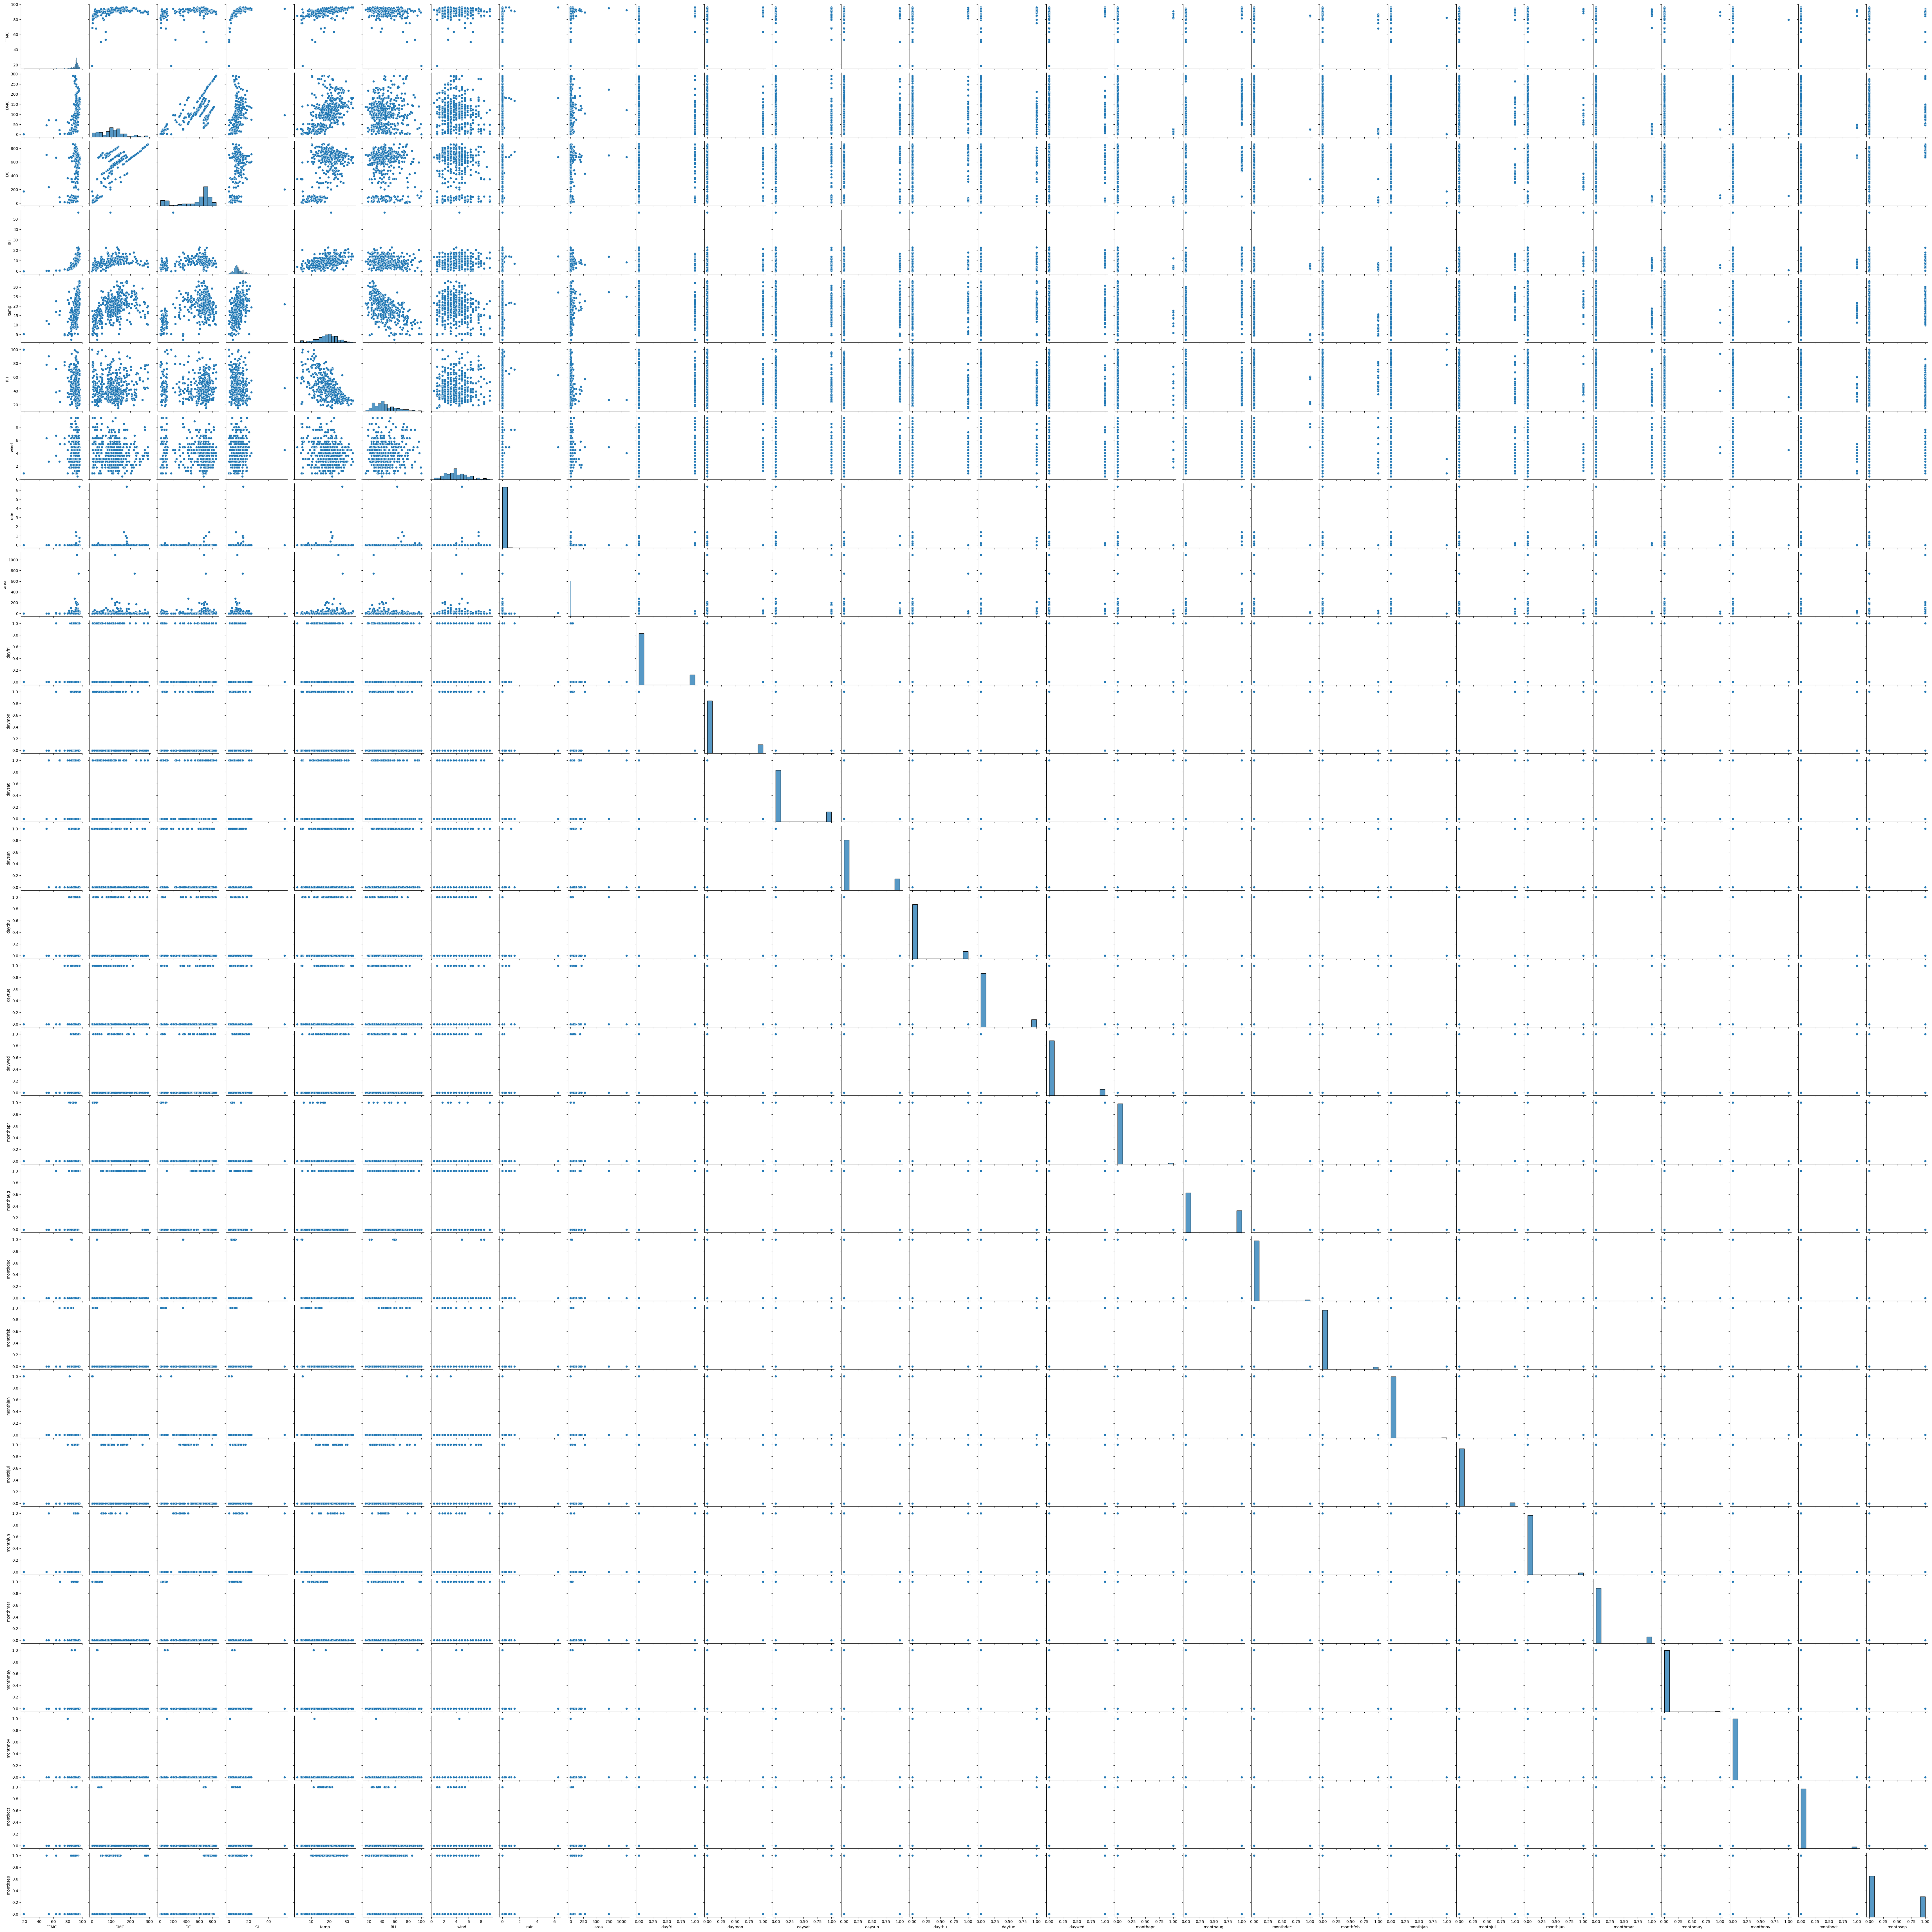

In [41]:
sns.pairplot(forest)

<ipython-input-43-48902c5d7d0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest.corr(), cmap="magma", annot=True, fmt=".3f")


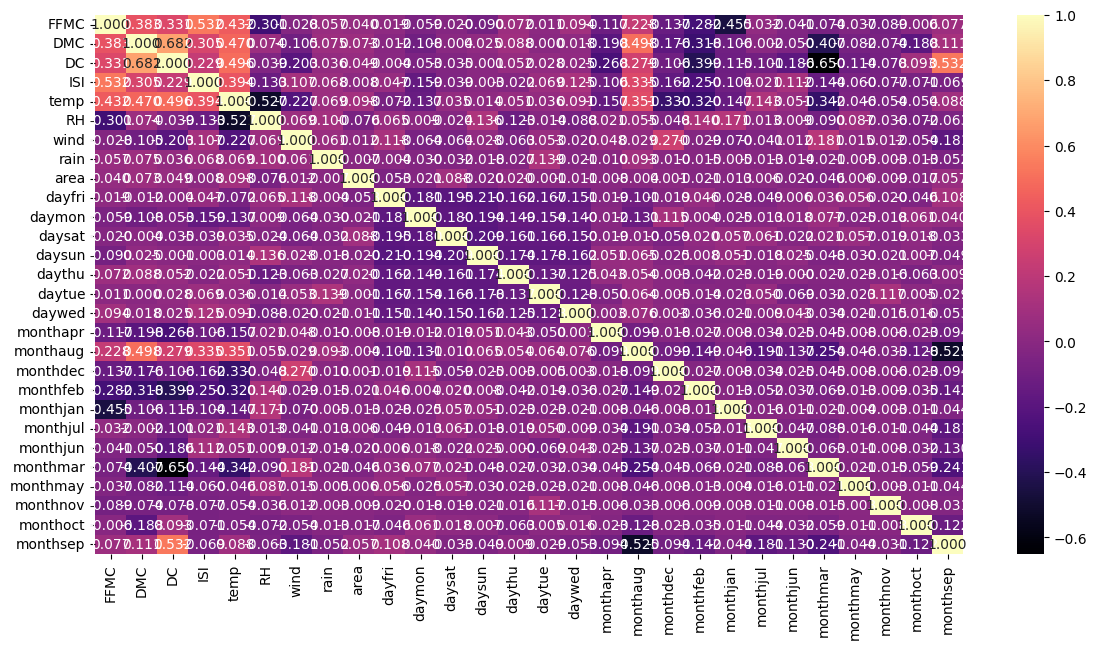

In [43]:
plt.figure(figsize=(14,7));
sns.heatmap(forest.corr(), cmap="magma", annot=True, fmt=".3f")
plt.show()

In [44]:
x=forest.iloc[:,0:30]
y=forest.iloc[:,30]

In [45]:
x

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthdec  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  
0           0         0  
1           1         0  
2           1         0  
3           0         0  
4           0         0  
..        ...       ...  
512         0         0  
513         0         0  
514         0         0  
515         0         0  
516         0         0  

[517 rows x 30 columns]

In [46]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)

In [48]:
x

month  day  FFMC  DMC   DC  ISI  temp  RH  wind  rain  ...  monthdec  \
0        7    0    28   37   41   29    12  34    14     0  ...         0   
1       10    5    56   49  144   42    85  16     1     0  ...         0   
2       10    2    56   56  156   42    55  16     2     0  ...         0   
3        7    0    67   48   33   64    13  72     8     1  ...         0   
4        7    3    46   66   46   68    30  73     3     0  ...         0   
..     ...  ...   ...  ...  ...  ...   ...  ..   ...   ...  ...       ...   
512      1    3     9   71  141    7   172  15     5     0  ...         0   
513      1    3     9   71  141    7   123  54    12     0  ...         0   
514      1    3     9   71  141    7   116  53    14     0  ...         0   
515      1    2    92  168  122   80   156  25     8     0  ...         0   
516      9    5     7    2   48    4    34  14     9     0  ...         0   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  
0           0         0  
1           1         0  
2           1         0  
3           0         0  
4           0         0  
..        ...       ...  
512         0         0  
513         0         0  
514         0         0  
515         0         0  
516         0         0  

[517 rows x 30 columns]

In [49]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=40)

In [50]:
model_linear=SVC(kernel="linear")
model_linear.fit(x_train, y_train)
preds_linear=model_linear.predict(x_test)
np.mean(preds_linear==y_test)

0.9871794871794872

In [51]:
model_poly=SVC(kernel="poly")
model_poly.fit(x_train, y_train)
preds_poly=model_poly.predict(x_test)
np.mean(preds_poly==y_test)

0.9935897435897436

In [52]:
model_rbf=SVC(kernel="rbf")
model_rbf.fit(x_train, y_train)
preds_rbf=model_rbf.predict(x_test)
np.mean(preds_rbf==y_test)

0.9871794871794872

In [53]:
from sklearn.metrics import classification_report
model=SVC()
model.fit(x_train, y_train)
pred=model.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

       large       1.00      0.95      0.97        38
       small       0.98      1.00      0.99       118

    accuracy                           0.99       156
   macro avg       0.99      0.97      0.98       156
weighted avg       0.99      0.99      0.99       156



In [54]:
np.mean(pred==y_test)

0.9871794871794872

In [55]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10],'C':[15,14,13,12] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12], 'gamma': [50, 5, 10],
                          'kernel': ['rbf']}])

In [56]:
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7202702702702704)

In [57]:
clf3 = SVC()
param_grid = [{'kernel':['sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['sigmoid']}])

In [58]:
gsv.best_params_, gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'sigmoid'}, 0.7147147147147148)